<a href="https://colab.research.google.com/github/Untick/NetOptik/blob/Polyakov-Alexander-branch/Polyakov%20Alexander/%20Classification_of_eyeglass_frames_v2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Классификация оправ очков

## Установка библиотек

In [3]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

from keras.preprocessing.image import ImageDataGenerator

## Подключение диска

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
DATASET_PATH='/content/drive/MyDrive/AI/datasets/plastIron/'

## Модель

config

In [6]:
batch_size = 50
epochs = 100
image_size = (120, 200)
class_names = ['iron', 'plastic']

Genertor

In [7]:
datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Нормализация пикселей
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% на валидацию
)

# Генератора обучающей выборки
train_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',  # два класса
    classes=class_names,  # Список названий классов
    subset='training',  # для обучения используется только часть данных
    shuffle=True
)

# Генератора валидационной выборки
validation_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    classes=class_names,
    subset='validation',  # Используем только часть данных для валидации
    shuffle=True
)

Found 716 images belonging to 2 classes.
Found 178 images belonging to 2 classes.


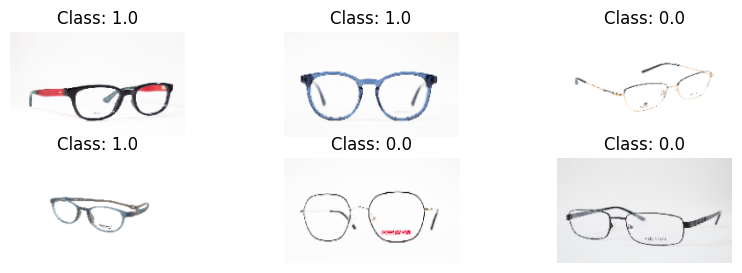

In [8]:
# Получение пакета изображений и меток из генератора
images, labels = next(train_generator)

# Отобразить несколько изображений из пакета
plt.figure(figsize=(10, 3))
for index in range(len(images[:6])):
    plt.subplot(2, 3, index + 1)
    plt.imshow(images[index])
    plt.title('Class: ' + str(labels[index]))
    plt.axis('off')
plt.show()

In [9]:
model = Sequential()

# Первый сверточный слой
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(120, 200, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Второй сверточный слой
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Третий сверточный слой
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Преобразование матрицы признаков в вектор
model.add(Flatten())

# Полносвязные слои
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))  # Dropout для борьбы с переобучением
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))  # Dropout для борьбы с переобучением
model.add(Dense(1, activation='sigmoid'))

# Display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 46, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 23, 64)       0

Epoch 1/100
14/14 [==============================] - ETA: 0s - loss: 0.7011 - accuracy: 0.5200
Epoch 1: val_accuracy improved from -inf to 0.52000, saving model to /content/drive/MyDrive/AI/datasets/plastIron/best_models/best_model_gen_8_2.h5
14/14 [==============================] - 40s 3s/step - loss: 0.7011 - accuracy: 0.5200 - val_loss: 0.6659 - val_accuracy: 0.5200
Epoch 2/100
14/14 [==============================] - ETA: 0s - loss: 0.5880 - accuracy: 0.6456
Epoch 2: val_accuracy improved from 0.52000 to 0.83333, saving model to /content/drive/MyDrive/AI/datasets/plastIron/best_models/best_model_gen_8_2.h5
14/14 [==============================] - 33s 2s/step - loss: 0.5880 - accuracy: 0.6456 - val_loss: 0.4122 - val_accuracy: 0.8333
Epoch 3/100
14/14 [==============================] - ETA: 0s - loss: 0.5143 - accuracy: 0.7523
Epoch 3: val_accuracy did not improve from 0.83333
14/14 [==============================] - 34s 2s/step - loss: 0.5143 - accuracy: 0.7523 - val_loss: 0.3884 -

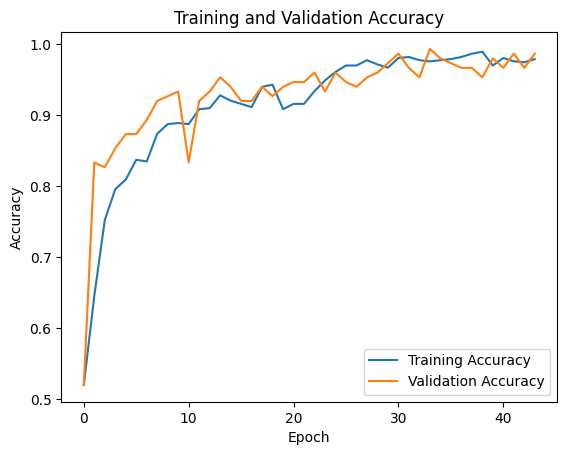

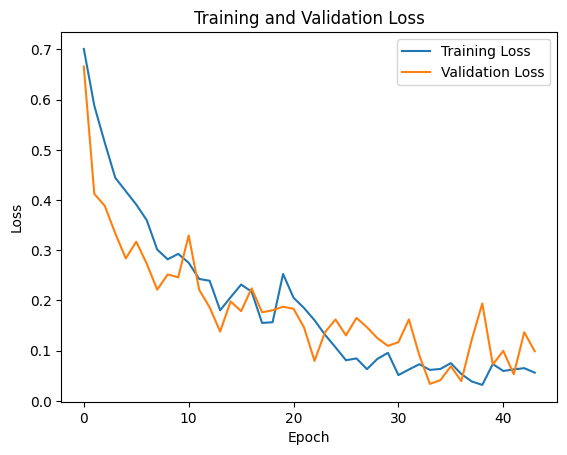

In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Создание обратного вызова EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1)
checkpoint = ModelCheckpoint(DATASET_PATH + "best_models/" + 'best_model_gen_8_2.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[checkpoint, early_stopping]
)

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


## ConfusionMatrix



Found 24 images belonging to 2 classes.
1/1 [==============================] - 1s 673ms/step


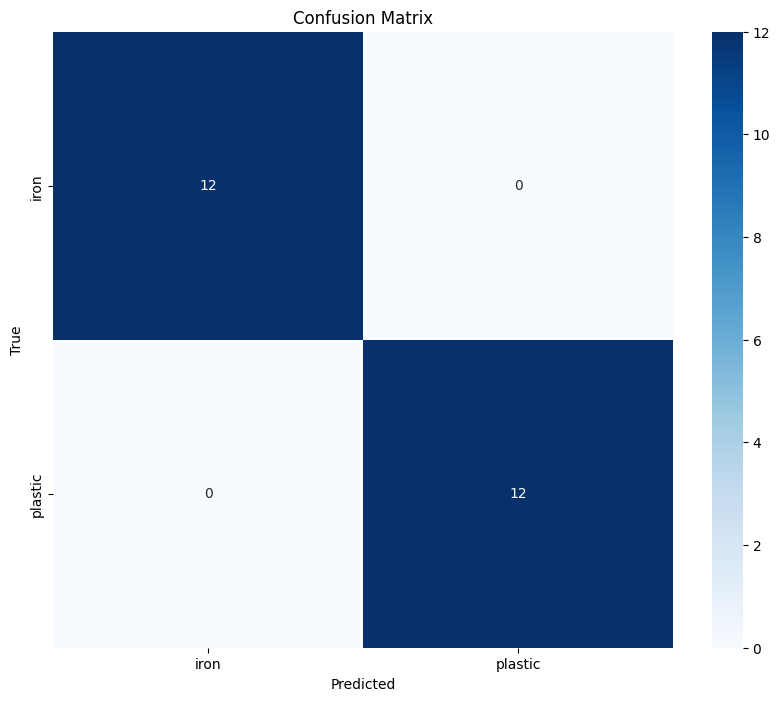

In [11]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Config
test_data_dir = 'test'

# Загрузка сохраненной модели
model = load_model(DATASET_PATH + "best_models/" + 'best_model_gen_8_2.h5')

# Создание генератора данных для тестовых изображений
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(
    DATASET_PATH + 'test/',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Получение предсказанных меток
y_pred = model.predict(test_generator)
y_pred_classes = np.round(y_pred).flatten().astype(int)  # Округляем вероятности до 0 или 1

# Фактические метки из генератора
y_true = test_generator.classes

# Создание матрицы ошибок
cm = confusion_matrix(y_true, y_pred_classes)

# Настройка визуализации
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()